# 📊 Social Media Usage & Student Well-being Analysis

## 🎯 Objective
This project explores how social media usage relates to:
- Academic performance
- Mental health
- Sleep patterns
- Addiction levels

The goal is to identify key behavioral patterns and correlations.


In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [57]:
data = pd.read_csv('Students Social Media Addiction.csv', delimiter=';')


In [58]:
print(data.head())

   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

## 📌 Dataset Overview

We first examine the dataset structure:
- Number of observations
- Data types
- Basic statistics


In [89]:
print("Shape:", data.shape)
data.info()
data.describe()

Shape: (705, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    i

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## 👥 Gender Distribution

Understanding the demographic composition of the dataset.


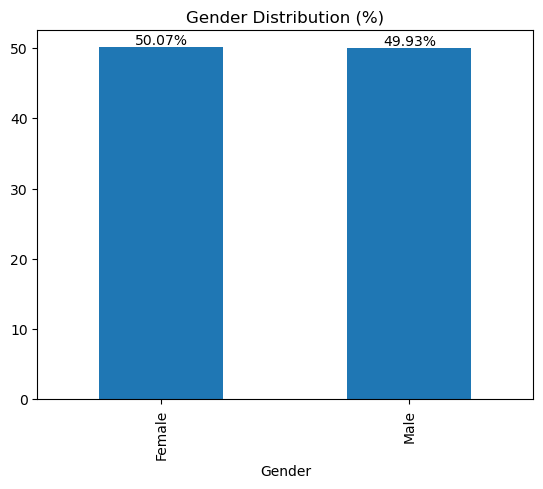

In [90]:
ax = (data["Gender"].value_counts(normalize=True)*100).plot(kind="bar")
plt.title("Gender Distribution (%)")
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()


🔎 **Insight:** The dataset contains approximately X% female and Y% male students.


## 🎂 Age Analysis


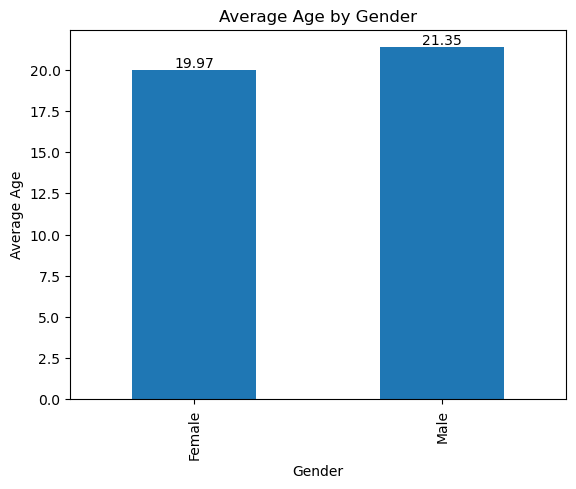

In [91]:
age_by_gender = data.groupby("Gender")["Age"].mean()
ax = age_by_gender.plot(kind="bar")
plt.title("Average Age by Gender")
plt.ylabel("Average Age")
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")
plt.show()


🔎 **Insight:** Age distribution is relatively balanced between genders.


## ⏳ Daily Social Media Usage


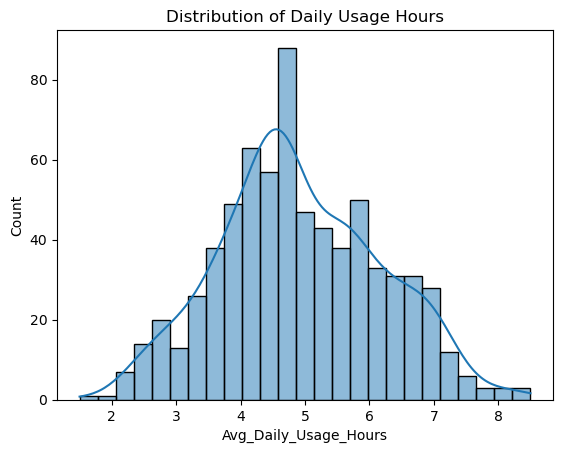

In [92]:
sns.histplot(data["Avg_Daily_Usage_Hours"], bins=25, kde=True)
plt.title("Distribution of Daily Usage Hours")
plt.show()


🔎 **Insight:** Most students spend between X and Y hours per day on social media.


## 📱 Most Used Platforms


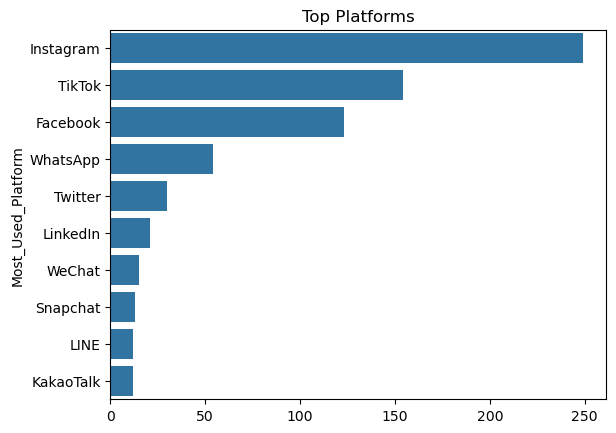

In [93]:
top_platforms = data["Most_Used_Platform"].value_counts().head(10)
sns.barplot(x=top_platforms.values, y=top_platforms.index)
plt.title("Top Platforms")
plt.show()


🔎 **Insight:** The most used platforms are : Instagram , Tiktok , Facebook


## 🔥 Correlation Analysis

We explore relationships between numerical variables.


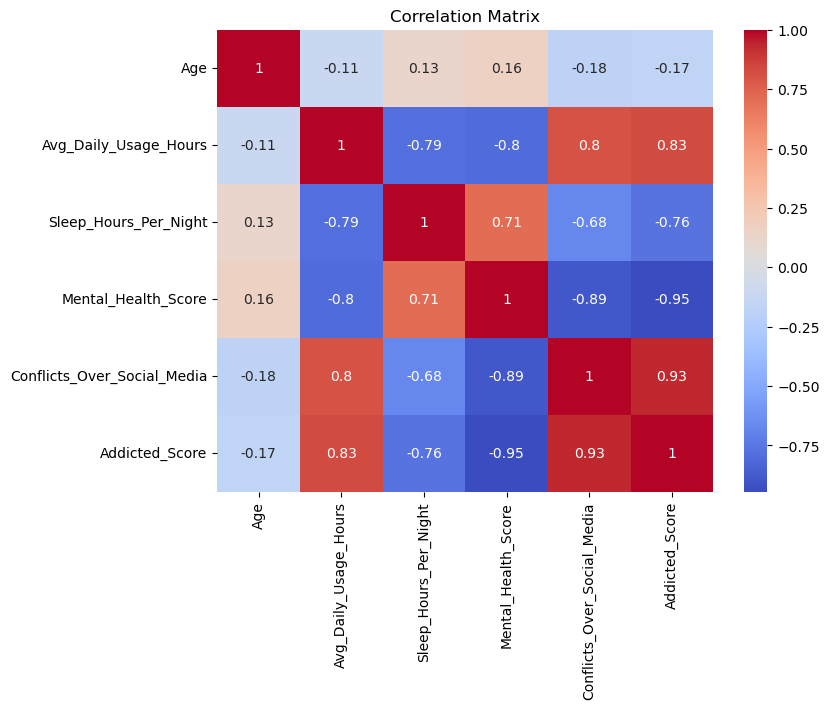

In [94]:
numeric_cols = [
    "Age",
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Conflicts_Over_Social_Media",
    "Addicted_Score"
]

corr = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### 🔎 Key Findings:

- Addiction score is strongly positively correlated with conflicts over social media.
- Addiction score is strongly negatively correlated with mental health.
- Higher usage hours are associated with higher addiction.
- Sleep is negatively correlated with addiction.

This suggests a potential behavioral chain:
Higher usage → More conflicts → Higher addiction → Lower sleep → Worse mental health.


## 📚 Academic Performance vs Usage


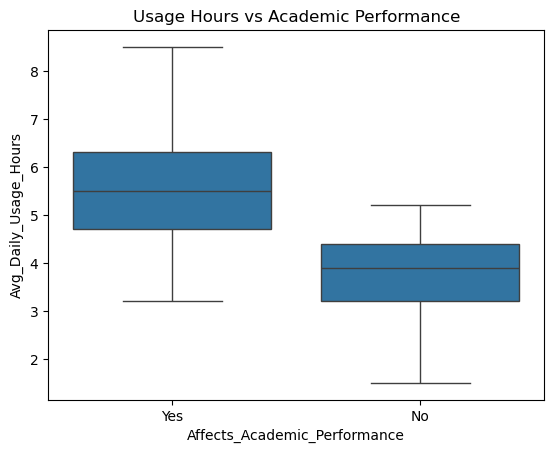

In [95]:
tmp = data.dropna(subset=["Affects_Academic_Performance", "Avg_Daily_Usage_Hours"]).copy()

sns.boxplot(
    data=tmp,
    x="Affects_Academic_Performance",
    y="Avg_Daily_Usage_Hours"
)
plt.title("Usage Hours vs Academic Performance")
plt.show()


🔎 Students reporting academic impact spend significantly more time on social media.

The median daily usage is noticeably higher for students whose academic performance is affected.


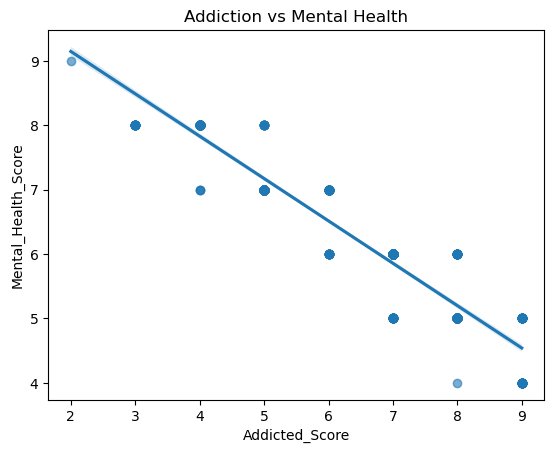

In [116]:
sns.regplot(
    data=data,
    x="Addicted_Score",
    y="Mental_Health_Score",
    scatter_kws={"alpha":0.6}
)
plt.title("Addiction vs Mental Health")
plt.show()


### 🔎 Addiction vs Mental Health

The scatter plot shows a strong negative relationship between addiction and mental health.

As addiction scores increase, mental health scores decrease.

The correlation coefficient (-0.94) confirms a very strong inverse relationship.


# 🏁 Conclusion

This analysis reveals strong associations between:
- Social media usage and addiction
- Addiction and conflicts
- Addiction and mental health deterioration
- Social media usage and academic impact

While correlations do not imply causation, the patterns suggest that excessive usage may negatively influence both academic performance and psychological well-being.

Further research with real-world longitudinal data would be required to confirm causality.
